# Python для DataScience
## Домашнее задание по уроку 3

### Задание 1
Импортируйте библиотеки pandas и numpy. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. <br/>
Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42. <br/> 
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model. <br/> 
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.  <br/>
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

##### Решение
Импортируем модули pandas & numpy

In [86]:
import pandas as pd
import numpy as np

Загрузим датасет "Boston House Prices dataset"

In [16]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [21]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=["price"])

Разобьем датафреймы на тренировочные и проверочные

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Создадим модель линейной регрессии под названием `lr` с помощью класса `LinearRegression` из модуля `sklearn.linear_model`. Обучим модель на датасетах `X_train`, `y_train`

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предсказание на тестовом датасете

In [49]:
y_pred = lr.predict(X_test)
y_pred.shape

(152, 1)

Сравним предсказанное с реальным

In [50]:
pd.DataFrame({
    'test': y_test["price"],
    'predict': y_pred.flatten()
}).head(10)

,test,predict
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


Вычислим R2 полученных предказаний

In [52]:
from sklearn.metrics import r2_score
lr_score = r2_score(y_test, y_pred);
lr_score

0.711226005748496

### Задание 2
Создайте модель под названием `model` с помощью `RandomForestRegressor` из модуля `sklearn.ensemble`. <br/>
Сделайте агрумент `n_estimators` равным 1000, `max_dept` должен быть равен $12$ и `random_state` сделайте равным $42$.<br/>
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель `LinearRegression`, но при этом в метод `fit` вместо датафрейма `y_train` поставьте `y_train.values[:, 0]`, чтобы получить из датафрейма одномерный массив `Numpy`, так как для класса `RandomForestRegresso` в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.<br/>
Сделайте предсказание на тестовых данных и посчитайте `R2`. Сравните с результатом из предыдущего задания.<br/>
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

##### Решение
Создадим и натренируем модель `RandomForestRegressor`

In [55]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.values[:, 0]);

In [56]:
y_pred = model.predict(X_test)

Сравним фактические значения с предсказанными

In [57]:
pd.DataFrame({
    'test': y_test["price"],
    'predict': y_pred.flatten()
}).head(10)

,test,predict
173,23.6,22.846138
274,32.4,31.156114
491,13.6,16.297226
72,22.8,23.821036
452,16.1,17.212148
76,20.0,21.820092
316,17.8,19.866369
140,14.0,14.759938
471,19.6,21.235224
500,16.8,20.883103


In [58]:
rf_score = r2_score(y_test, y_pred)
rf_score

0.8749965273218174

In [60]:
print(f'Linear Regression score: {lr_score}\nRandom Forest score: {rf_score}')

Linear Regression score: 0.711226005748496
Random Forest score: 0.8749965273218174


Из полученных оценок можно заключить что модель "Случайный лес" предсказывает точнее в данном случае

### Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances.
С помощью этого атрибута найдите сумму всех показателей важности, установите, какие два признака показывают наибольшую важность.

In [114]:
import matplotlib.pyplot as plt

Используя `feature_importances`, найдем наиболее важные признаки и сумму всех показателей важности

In [115]:
tree_scores = model.feature_importances_

for i in range(len(tree_scores)):
    print(f"{X.keys()[i]:8}: {tree_scores[i]:.4f}")
print(f'{"SUM":8}: {np.sum(tree_scores):.4f} ')

CRIM    : 0.0321
ZN      : 0.0015
INDUS   : 0.0071
CHAS    : 0.0011
NOX     : 0.0144
RM      : 0.4027
AGE     : 0.0142
DIS     : 0.0640
RAD     : 0.0050
TAX     : 0.0117
PTRATIO : 0.0181
B       : 0.0123
LSTAT   : 0.4157
SUM     : 1.0000 


Также, оценим графически значимость признаков

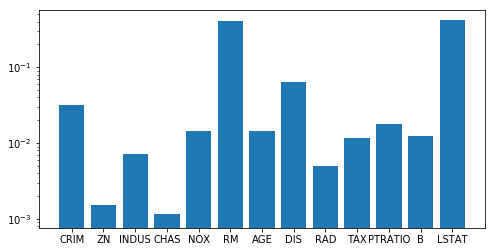

In [117]:
plt.figure(figsize=[8,4])
plt.yscale('log')
plt.bar(X.keys(), tree_scores, );

Таким образом, можно заявить что наиболее важными признаками являются RM, LSTAT

### Задание 4 
### Это задание я еще не доделал, но собираюсь в скором времени

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке `Matplotlib`, это датасет Credit Card Fraud Detection. Для этого датасета мы будем решать задачу классификации — определять, какие из транзакциции по кредитной карте являются мошенническими.
Данный датасет несбалансирован (так как случаи мошенничества относительно редки), так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.
Мы будем вычислять `AUC`, то есть площадь под кривой `ROC`.
Импортируйте из соответствующих модулей `RandomForestClassifier`, `GridSearchCV` и `train_test_split`. Загрузите датасет `creditcard.csv` и создайте датафрейм `df`.
С помощью метода `value_counts` с аргументом `normalize=True` убедитесь в том, что выборка несбалансирована.
Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:

`pd.options.display.max_columns = 100`

Просмотрите первые 10 строк датафрейма `df`.

Создайте датафрейм `X` из датафрейма `df`, исключив столбец `Clas`.
Создайте объект Series под названием `y` из столбца `Class`.
Разбейте `X` и `y` на тренировочный и тестовый наборы данных при помощи функции `train_test_split`, используя аргументы: `test_size=0.3`, `random_state=100`, `stratify=y`.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.

Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.

Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,
полученным на тренировочных данных, используя в качестве аргументов
массивы y_test и y_pred_proba.

##### Решение
Скачаем датасет, если он еще не скачен, и загрузим

In [145]:
import os
import urllib.request
csv_link_path = 'https://uploads.hb.cldmail.ru/asset/1388504/attachment/ed921b4d99af49e85ad2305f1973dc51.csv'
csv_name = 'creditcard.csv'
if not os.path.isfile(f'csv/{csv_name}'):
    if not os.path.isdir('csv'):
        os.mkdir('csv')
    urllib.request.urlretrieve(csv_link_path, f'csv/{csv_name}') 

In [150]:
df = pd.read_csv(f'csv/{csv_name}')

Импортироуем `RandomForestClassifier`, `GridSearchCV` и `train_test_split`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

### Дополнительные задания:
1. Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [125]:
from sklearn.datasets import load_wine
data = load_wine()

2. Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [128]:
data_keys = data.keys()
type(data), data_keys

(sklearn.utils.Bunch,
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names']))

3. Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т. д.

In [135]:
pd.DataFrame(boston['data'], columns=boston['feature_names']).head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [131]:
[print(l) for l in data.DESCR.split('\n')];

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

4. Сколько классов содержит целевая переменная датасета? Выведите названия классов.

Как можно видеть из описания, целевая переменная содержит три класса

In [134]:
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

5. На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.

In [136]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])

6. Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Пропущенных значений в датасете нет. Я бы даже удивился, если бы они были в тестовых датасетах библиотеки

### Эти задания я еще не выполнил, но собираюсь в скором времени

7. Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

8. Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

9. Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).

10. Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.